In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim

from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import TransformedTargetRegressor
from category_encoders import TargetEncoder

import xgboost as xgb

# plotting defaults
plt.rc('figure', figsize=(18, 9))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

import viz
import wrangle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('car_prices.csv', error_bad_lines=False)

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

In [3]:
df= wrangle.clean_cars(df)

In [4]:
train, validate, test = wrangle.split_cars(df)

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 513877 │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 19     │ │ int64       │ 7     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p75     ┃ p100     ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ year                │    0 │      0 │    2000 │     3.8 │   2000 │    2000 │    2000 │     2000 │    ▁▂▂█  │  │
│ │ condition           │    0 │      0 │     3.4 │    0.95 │      1 │     2.7 │     4.2 │        5 │   ▄▄▅█▅  │  │
│ │ odometer            │    0 │      0 │   66000 │   51000 │      1 │   28000 │   96000 │   500000 │   █▃▁    │  │
│ │ mmr                 │    0 │      0 │   14000 │    8700 │     25 │    7500 │   18000 │    77000 │   █▆▁    │  │
│ │ sellingprice        │    0 │      0 │   14000 │    8800 │      1 │    7300 │   18000 │    52000 │   ▆█▄▁   │  │
│ │ saleyear            │    0 │      0 │    2000 │    0.27 │   2000 │    2000 │    2000 │     2000 │  ▁    █  │  │
│ │ age_at_sale         │    0 │      0 │     4.7 │     3.8 │      1 │       2 │       7 │       25 │   █▂▂    │  │
│ │ miles_per_year      │    0 │      0 │   16000 │    9100 │      0 │   10000 │   20000 │   220000 │    █     │  │
│ └─────────────────────┴──────┴────────┴─────────┴─────────┴────────┴─────────┴─────────┴──────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ make                       │      0 │          0 │                            1 │                   520000 │  │
│ │ model                      │      0 │          0 │                            1 │                   520000 │  │
│ │ trim                       │      0 │          0 │                            1 │                   520000 │  │
│ │ body                       │      0 │          0 │                            1 │                   520000 │  │
│ │ transmission               │      0 │          0 │                            1 │                   520000 │  │
│ │ vin                        │      0 │          0 │                            1 │                   520000 │  │
│ │ state                      │      0 │          0 │                            1 │                   520000 │  │
│ │ color                      │      0 │          0 │                            1 │                   520000 │  │
│ │ interior                   │      0 │          0 │  

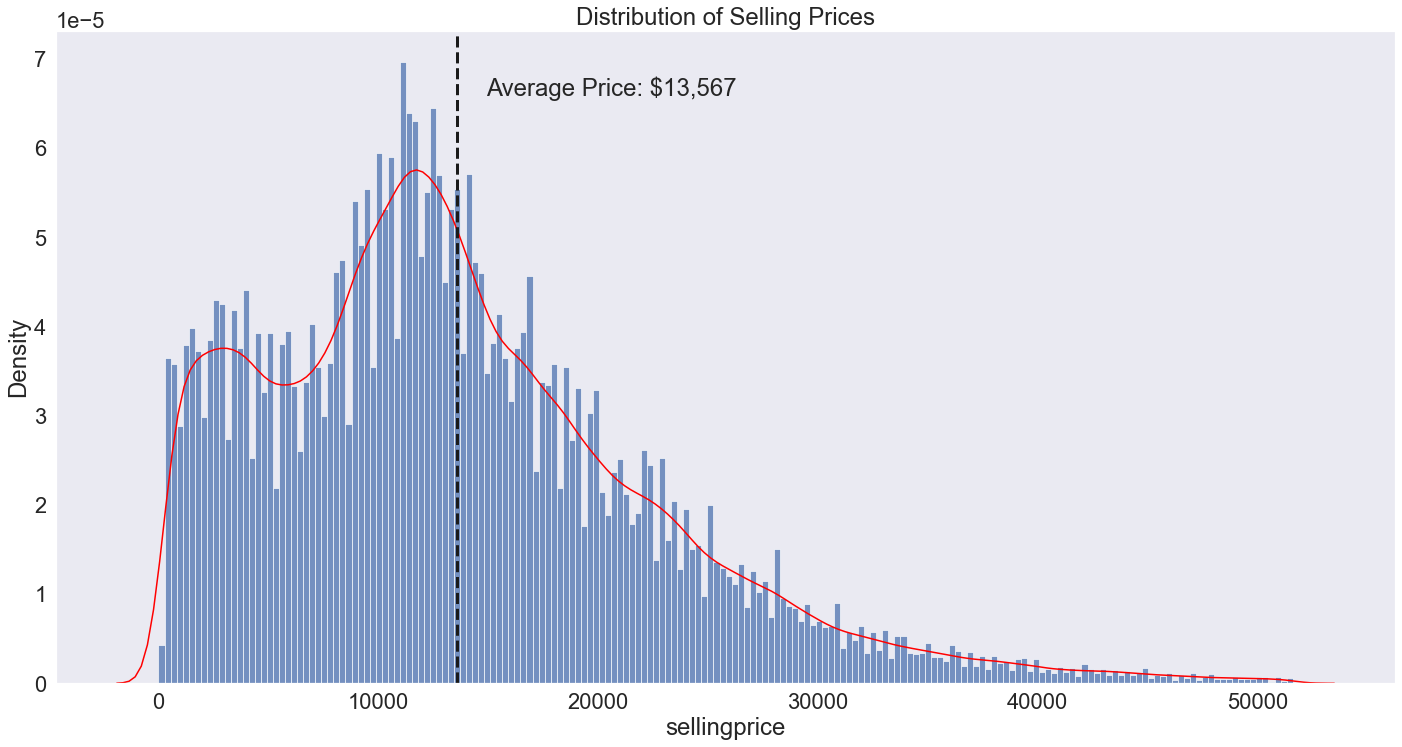

In [6]:
viz.plot_dist(df)

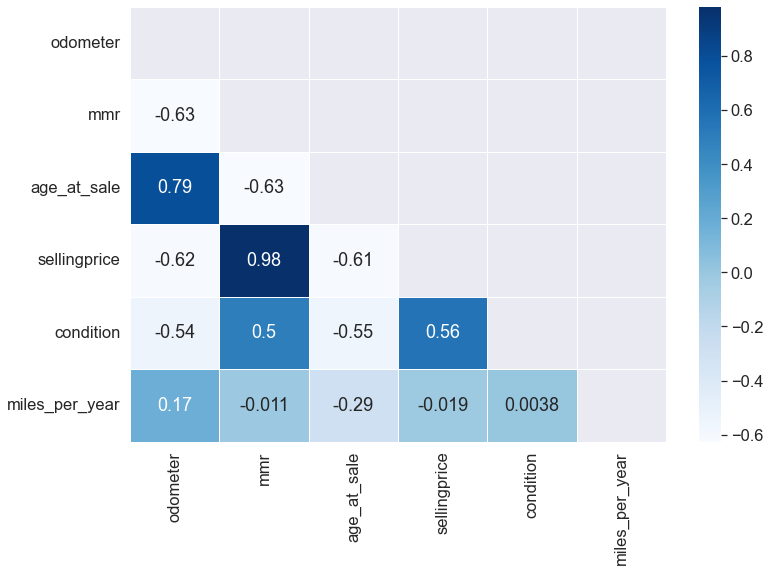

In [7]:
viz.corr_plot(train)

In [8]:
train.trim.value_counts()

Base                 30867
SE                   25281
LX                   11942
Limited              10357
LT                    9704
                     ...  
25th Anniversary         1
Ribelle                  1
SS/T                     1
Black Tie Edition        1
SLE2 XFE                 1
Name: trim, Length: 1425, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308325 entries, 336904 to 453133
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            308325 non-null  int64  
 1   make            308325 non-null  object 
 2   model           308325 non-null  object 
 3   trim            308325 non-null  object 
 4   body            308325 non-null  object 
 5   transmission    308325 non-null  object 
 6   vin             308325 non-null  object 
 7   state           308325 non-null  object 
 8   condition       308325 non-null  float64
 9   odometer        308325 non-null  int64  
 10  color           308325 non-null  object 
 11  interior        308325 non-null  object 
 12  seller          308325 non-null  object 
 13  mmr             308325 non-null  int64  
 14  sellingprice    308325 non-null  int64  
 15  saledate        308325 non-null  object 
 16  saleyear        308325 non-null  int64  
 17  age_a

In [8]:
cats=['trim', 'body', 'make', 'transmission', 'state', 'model']
te = TargetEncoder()
t_values = te.fit_transform(X = train[cats], y = train.sellingprice).add_prefix('enc_')
train = pd.concat([train, t_values], axis = 1)

v_values = te.transform(X = validate[cats], y = validate.sellingprice).add_prefix('enc_')
validate = pd.concat([validate, v_values], axis = 1)

test_values = te.transform(X = test[cats], y = test.sellingprice).add_prefix('enc_')
test = pd.concat([test, test_values], axis = 1)

In [9]:
train

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,saledate,saleyear,age_at_sale,miles_per_year,enc_trim,enc_body,enc_make,enc_transmission,enc_state,enc_model
336904,2011,Mercedes-Benz,C-Class,C300 Luxury 4MATIC,sedan,automatic,wddgf8bb8br160819,PA,3.8,45791,...,Fri Feb 20 2015 01:00:00 GMT-0800 (PST),2015,4,11447,19532.272727,11889.400451,20292.590389,13501.544463,15665.373120,17809.305141
378530,2007,Saturn,VUE,Base,SUV,manual,5gzcz23d27s843143,TX,2.6,107186,...,Wed Mar 04 2015 02:30:00 GMT-0800 (PST),2015,8,13398,13388.910195,15928.833354,3346.361880,10749.221372,13157.058296,3308.350305
429647,2013,Chrysler,200,Limited,sedan,automatic,1c3ccbcg9dn655571,MI,4.2,19242,...,Thu May 21 2015 02:30:00 GMT-0700 (PDT),2015,2,9621,16810.391909,11889.400451,11407.611934,13501.544463,15077.875355,11217.561102
304344,2005,Chevrolet,Cobalt,Base,coupe,automatic,1g1ak12f957574027,PA,1.9,86046,...,Fri Feb 13 2015 01:00:00 GMT-0800 (PST),2015,10,8604,13388.910195,14904.445245,11857.097298,13501.544463,15665.373120,3427.085506
61836,2013,Lexus,GS 350,Base,sedan,automatic,jthbe1bl5d5024230,FL,4.8,13668,...,Tue Dec 30 2014 09:30:00 GMT-0800 (PST),2014,1,13668,13388.910195,11889.400451,20066.164373,13501.544463,13790.509741,28226.238739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322784,2013,Ford,F-150,STX,truck,automatic,1ftex1cm8dkf44584,MI,3.3,14932,...,Thu Feb 26 2015 01:30:00 GMT-0800 (PST),2015,2,7466,15396.805112,17910.502881,14598.024132,13501.544463,15077.875355,19044.915488
367772,2005,Ford,Econoline Cargo,E-250,van,unknown_transmission,1ftne24w85ha57041,NV,2.0,185557,...,Thu Feb 26 2015 03:00:00 GMT-0800 (PST),2015,10,18555,16040.920635,12509.516587,14598.024132,14781.753259,15026.781856,4692.857143
174249,2013,Cadillac,ATS,Luxury,sedan,unknown_transmission,1g6ab5raxd0152822,PA,3.9,33443,...,Fri Feb 13 2015 01:00:00 GMT-0800 (PST),2015,2,16721,20961.228346,11889.400451,15126.485392,14781.753259,15665.373120,20514.119658
338057,2014,Chevrolet,Camaro,LT,coupe,unknown_transmission,2g1fc1e35e9185520,PA,5.0,4793,...,Fri Feb 20 2015 09:30:00 GMT-0800 (PST),2015,1,4793,13826.873969,14904.445245,11857.097298,14781.753259,15665.373120,19271.462037


In [8]:
correlation_test(train, 'sellingprice', 'miles_per_year')

NameError: name 'correlation_test' is not defined

In [ ]:
def correlation_test(df, f1, f2):
    r, p = stats.pearsonr(df[f1], df[f2])
    if p < .05:
        print(f'The null hypothesis is rejected!  {f1} is linearly correlated to {f2}')
    else:
        print(f'The null hypothesis is confirmed! {f1} is not linearly correlated to {f2}')
    print('R =',round(r,2))
    

In [ ]:
correlation_test(train, 'odometer', 'age_at_sale')

In [ ]:
def compare_means(df,discrete_col,continuous_col):
    group = df.groupby([discrete_col],as_index=False)[continuous_col].mean().reset_index(drop=True)
    plt.figure(figsize=(10,5))
    sns.barplot(x=group[discrete_col],y=group[continuous_col],palette='Reds')
    plt.ylabel('mean ' + continuous_col)
    plt.show()

In [ ]:
compare_means(train, 'make_cat', 'sellingprice')

In [ ]:
for cat in ['make_cat', 'state_cat', 'color_cat', 'interior_cat', 'body', 'transmission', 'trim_cat']:
    dummies = pd.get_dummies(df[cat], drop_first=True)
    df = pd.concat([df, dummies], axis=1)

In [ ]:
df.columns.tolist()

In [ ]:
features = ['year',
 
 'condition',
 'odometer',
 'mmr',
 'sellingprice',
 'age_at_sale',
 'miles_per_year',
 'high_mid_make',
 'low_mid_make',
 'luxury_make',
 'high_state',
 'mid_state',
 'low_color',
 'mid_color',
 'low_interior',
 'mid_interior',
 'SUV',
 'convertible',
 'coupe',
 'hatchback',
 'sedan',
 'truck',
 'van',
 'wagon',
 'manual',
 'unknown_transmission',
 'trim10',
 'trim2',
 'trim9']

In [ ]:
train, validate, test = wrangle.split_cars(df[features])

In [ ]:
X_train = train.drop(columns = 'sellingprice')
X_val = validate.drop(columns= 'sellingprice')
X_test = test.drop(columns='sellingprice')

y_train = train.sellingprice
y_val = validate.sellingprice
y_test = test.sellingprice

In [ ]:
# build pipeline
pipeline = Pipeline([('scaler', MinMaxScaler()), ('model', xgb.XGBRegressor(eta=.1,
                                                                           gamma=0,
                                                                           min_child_weight=3,
                                                                           max_depth=6))])

In [ ]:
# fit model
pipeline.fit(X_train, y_train)


In [ ]:
# predict
yhat_train = pipeline.predict(X_train)
yhat_val = pipeline.predict(X_val)

In [ ]:
rmse_train = mean_squared_error(y_train, yhat_train, squared=False)
rmse_val = mean_squared_error(y_val, yhat_val, squared=False)
r2_train = r2_score(y_train, yhat_train)
r2_val = r2_score(y_val, yhat_val)
print(f'In-sample RMSE: {rmse_train}, In-sample r2: {r2_train}')
print(f'Out-of-sample RMSE: {rmse_val}, Out-of-sample r2: {r2_val}')


In [ ]:
print(rmse_val, r2_val)

LRmodel - Best RMSE:  train=1470/97% , val=1474/97%

XGmodel - Best RMSE:  train=1320/98% , val=1416/97%

    Predicting mean selling price (Mean baseline):  $8756 
    Predicting MMR (MMR baseline):  $1659

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
xgb.plot_importance()

In [ ]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [ ]:
df

In [ ]:
train